
</h1>

<h1>
<center>Report for Credit Card Approval Prediction</center>
</h1>

# 1. Introduction
Credit score card is a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank could use this kind of predicted probability to decide whether to issue a credit card to an applicant or not.
If the future default rate is high, the bank would refuse to release the credit card to the applicant, otherwise the bank would release the card to the applicant.

Credit cards is a form of unsecured credit (meaning a loan without collateral) that one can use to make everyday purchases in the limited credits. When someone buys something with a credit card, that means he/she borrows money from the credit card issuer, and later payment back to the lender with interest.

Based on the property of credit card, the card issuers have the risk of defaults of clients

The goal of my project is to bulid models to make prediction of the risk rate(default rate) about the applicant based on each person's personnal data.

# 2. Dataset Explaination
* The target variable in the dataset named as "Target". 1 represts high risk, 0 represents low risk.
* The goal is to predict the classification of the variable "Target", 1(high risk) or 0(low risk).
* I searched the datasets from Kaggle. But the information of what bank, who are the people in the data, what's the date, etc. is not available. This kind of information is confident for the financial institution. It is not easy to access.
* An instance in my data represents the personal message of a person. There are 21 columns in the initial dataset, including gender, occupation, property situation, children number, income, education level, etc., the details are interpreted in the following.
 * ID: client ID number
 * Gender: M: male; F: female
 * Own_car: Does client own a car? Y: yes; N: No
 * Own_property: Does client own property? Y: yes; N: No
 * Work_phone: Y: Does client own a work phone? Y: yes; N: No
 * Phone: Does client own a phone? Y: yes; N: No
 * Email: Does client have an email address? Y: yes; N: No
 * Unemployed: Is client unemployed? Y: yes; N: No
 * Num_children: How many children does client have?
 * Num_family: Number of family members
 * Account_length: Number of months credit card has been owned
 * Total_income: Total income of a year(Chinese Yuan)
 * Age: Age in years
 * Years_employed: Number of years employed
 * Income_type:	Income type
 * Education_type: Education type
 * Family_status: Family status
 * Housing_type: Housing type
 * Occupation_type:	Occupation type
 * Target: Target Variable(1: high risk, 0: low risk)

* I dropped the features of "ID", "Unemployed", and the index column, and keep the left features to predict the classification.


# 2.1 Load the data

In [ ]:
import os
import pandas as pd
data = pd.read_csv("data_clean.csv")

In [ ]:
data.head()

,Unnamed: 0,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,...,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,0,5008804,M,Y,Y,Y,N,N,N,0,...,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,5008806,M,Y,Y,N,N,N,N,0,...,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,2,5008808,F,N,Y,N,Y,Y,N,0,...,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,3,5008812,F,N,Y,N,N,N,Y,0,...,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,4,5008815,M,Y,Y,Y,Y,Y,N,0,...,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9709 non-null   int64  
 1   ID               9709 non-null   int64  
 2   Gender           9709 non-null   object 
 3   Own_car          9709 non-null   object 
 4   Own_property     9709 non-null   object 
 5   Work_phone       9709 non-null   object 
 6   Phone            9709 non-null   object 
 7   Email            9709 non-null   object 
 8   Unemployed       9709 non-null   object 
 9   Num_children     9709 non-null   int64  
 10  Num_family       9709 non-null   int64  
 11  Account_length   9709 non-null   int64  
 12  Total_income     9709 non-null   float64
 13  Age              9709 non-null   float64
 14  Years_employed   9709 non-null   float64
 15  Income_type      9709 non-null   object 
 16  Education_type   9709 non-null   object 
 17  Family_status 

# 2.2 Data Preparation
The column "Unemployment" is repeated by the column of "Years_employed", drop the column "Unemployed".

In [ ]:
new_data = data.drop(data.iloc[:, [0, 1, 8]], axis=1) #drop the index and ID columns and umemployment

In [ ]:
new_data.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,M,Y,Y,Y,N,N,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,M,Y,Y,N,N,N,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,F,N,Y,N,Y,Y,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,F,N,Y,N,N,N,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,M,Y,Y,Y,Y,Y,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [ ]:
new_data.info() #18 columns left

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   object 
 1   Own_car          9709 non-null   object 
 2   Own_property     9709 non-null   object 
 3   Work_phone       9709 non-null   object 
 4   Phone            9709 non-null   object 
 5   Email            9709 non-null   object 
 6   Num_children     9709 non-null   int64  
 7   Num_family       9709 non-null   int64  
 8   Account_length   9709 non-null   int64  
 9   Total_income     9709 non-null   float64
 10  Age              9709 non-null   float64
 11  Years_employed   9709 non-null   float64
 12  Income_type      9709 non-null   object 
 13  Education_type   9709 non-null   object 
 14  Family_status    9709 non-null   object 
 15  Housing_type     9709 non-null   object 
 16  Occupation_type  9709 non-null   object 
 17  Target        

Calculate the default rate of the data set.

In [ ]:
default_rate = (new_data['Target']==1).sum() / len(new_data['Target'])
default_rate

0.132145432073334

Use the train_test_split() function in Scikit-Learn to create a train/test set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(new_data, test_size = 0.2, random_state = 42)

In [ ]:
train_set.info(), test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7767 entries, 3467 to 7270
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7767 non-null   object 
 1   Own_car          7767 non-null   object 
 2   Own_property     7767 non-null   object 
 3   Work_phone       7767 non-null   object 
 4   Phone            7767 non-null   object 
 5   Email            7767 non-null   object 
 6   Num_children     7767 non-null   int64  
 7   Num_family       7767 non-null   int64  
 8   Account_length   7767 non-null   int64  
 9   Total_income     7767 non-null   float64
 10  Age              7767 non-null   float64
 11  Years_employed   7767 non-null   float64
 12  Income_type      7767 non-null   object 
 13  Education_type   7767 non-null   object 
 14  Family_status    7767 non-null   object 
 15  Housing_type     7767 non-null   object 
 16  Occupation_type  7767 non-null   object 
 17  Target     

(None, None)

Design a pipeline for preprocessing that applies one hot encoding to the categorical features and a standard scaler to the numerical features

In [ ]:
X_raw_train = train_set.drop("Target", axis=1)
X_raw_test = test_set.drop("Target", axis=1)

y_train = train_set["Target"]
y_test = test_set["Target"]

In [ ]:
X_raw_train.shape

(7767, 17)

In [ ]:
X_raw_test.shape

(1942, 17)

In [ ]:
X_raw_train_num = X_raw_train[["Num_children", "Num_family", "Account_length", "Total_income", "Age", "Years_employed"]]
X_raw_train_cat = X_raw_train.drop(columns=["Num_children", "Num_family", "Account_length", "Total_income", "Age", "Years_employed"])

Build a pipeline for preprocessing the numerical attributes and categorical features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder  # X_train AND X_test have different dimensions if using "OneHotEncoder"!!!
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(X_raw_train_num)
cat_attribs = list(X_raw_train_cat)

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs)
    ])
X_train = full_pipeline.fit_transform(X_raw_train)
X_test = full_pipeline.fit_transform(X_raw_test)

In [ ]:
X_train.shape

(7767, 17)

In [ ]:
X_test.shape

(1942, 17)

# 3. Analysis Process

# 3.1  Train the Classification Models

Four classifiers in my project.

(i) Random forest classifier

(ii) Extra trees classifier

(iii) AdaBoost classifier

(iv) Graident boost classifier

(i) Logistic Regression

Note that using the roc_auc_score() method below is the same as doing accuracy_score(y_test, forest.predict(X_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
%time forest.fit(X_train, y_train)

extratrees = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)
%time extratrees.fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.2, random_state=42)
%time ada.fit(X_train, y_train)

gb = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=0.25, random_state=42)
%time gb.fit(X_train, y_train)

%time logistic.fit(X_train, y_train)

Wall time: 531 ms
Wall time: 366 ms
Wall time: 367 ms
Wall time: 78.2 ms
Wall time: 46.8 ms


LogisticRegression(random_state=42)

In [ ]:
# Do the cross validation prediction of each instance using 10-fold CV.
y_pred_forest = cross_val_predict(forest, X_train, y_train, cv=10)
y_pred_extratrees = cross_val_predict(extratrees, X_train, y_train, cv=10)
y_pred_ada = cross_val_predict(ada, X_train, y_train, cv=10)
y_pred_gb = cross_val_predict(gb, X_train, y_train, cv=10)
y_pred_logistic = cross_val_predict(logistic, X_train, y_train, cv=10, method="decision_function")

##### Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores for the 5 models

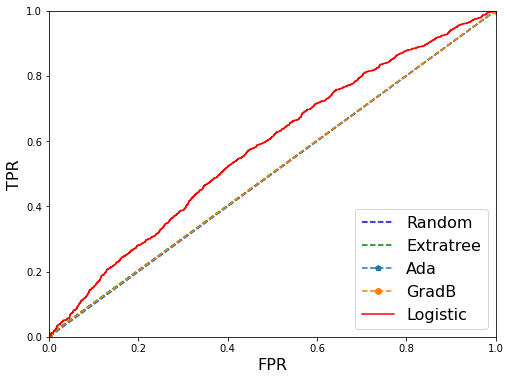

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))

fpr, tpr, thresholds = roc_curve(y_train,y_pred_forest)
plt.plot(fpr, tpr, "b--", label="Random")

fpr, tpr, thresholds = roc_curve(y_train,y_pred_extratrees)
plt.plot(fpr, tpr, "g--", label="Extratree")

fpr, tpr, thresholds = roc_curve(y_train,y_pred_ada)
plt.plot(fpr, tpr, "p--", label="Ada")

fpr, tpr, thresholds = roc_curve(y_train,y_pred_gb)
plt.plot(fpr, tpr, "o--", label="GradB")

fpr, tpr, thresholds = roc_curve(y_train,y_pred_logistic)
plt.plot(fpr, tpr, "r-", label="Logistic")

plt.xlabel("FPR", fontsize=16)
plt.ylabel("TPR", fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.show()

In [ ]:
print("ROC AUC RandomForestClassifier:",roc_auc_score(y_train, y_pred_forest))
print("ROC AUC ExtraTreesClassifier:",roc_auc_score(y_train, y_pred_extratrees))
print("ROC AUC AdaBoostClassifier:",roc_auc_score(y_train, y_pred_ada))
print("ROC AUC GradientBoostingClassifier:",roc_auc_score(y_train, y_pred_gb))
print("ROC AUC logistic:",roc_auc_score(y_train, y_pred_logistic))

ROC AUC RandomForestClassifier: 0.5004827840993055
ROC AUC ExtraTreesClassifier: 0.5028967045958328
ROC AUC AdaBoostClassifier: 0.4999261120141865
ROC AUC GradientBoostingClassifier: 0.5018522240283729
ROC AUC logistic: 0.5794875129303975


From the above results, we can tell that Logistic Regression model is the best model.

Then focus on the best model to search for the best hyperparameter.

In [ ]:
y_pred_train = cross_val_predict(logistic, X_train, y_train, cv=10)
y_pred_test = cross_val_predict(logistic, X_test, y_test, cv=10)

print("Accuracy score for train set:",accuracy_score(y_train, y_pred_train))
print("Accuracy score for test set:",accuracy_score(y_test, y_pred_test))
print("Default rate of the data set:",default_rate)

Accuracy score for train set: 0.8712501609372988
Accuracy score for test set: 0.8542739443872297
Default rate of the data set: 0.132145432073334


The best model is the Logistic Regression.

And from the results of the accuracy score values, we could see a slight overfitting of the best model.


# 4 Tuning Model for the Best Hyperparameter

From the results from step 3, the Logistic regression model is the best model.

Then go to find the best hyperparameter for the Logistic regression model.

In [ ]:
import numpy as np
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

logis = LogisticRegression(max_iter=5000)
param_grid = {"C": np.arange (0, 1.1, 0.1)}

# The grid search model
grid_search = GridSearchCV(logis, param_grid,
                                  cv=3,
                                  verbose=2, n_jobs=-1)
%time grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


C:\ANACONDA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.87125016 0.87125016 0.87125016 0.87125016 0.87125016
 0.87125016 0.87125016 0.87125016 0.87125016 0.87125016]
  warnings.warn(


Wall time: 1.96 s


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             verbose=2)

In [ ]:
print(grid_search.best_params_)

{'C': 0.1}


In [ ]:
print(grid_search.best_score_)

0.8712501609372989


In [ ]:
logistic_2 = LogisticRegression(C=0.1,max_iter=5000)
%time logistic_2.fit(X_train, y_train)

Wall time: 79.4 ms


LogisticRegression(C=0.1, max_iter=5000)

In [ ]:
y_pred_logistic_2 = cross_val_predict(logistic_2, X_train, y_train, cv=10, method="decision_function")
y_pred_logistic = cross_val_predict(logistic, X_train, y_train, cv=10, method="decision_function")
print("ROC AUC logistic After Tuning model:",roc_auc_score(y_train, y_pred_logistic_2))
print("ROC AUC logistic Before Tuning model:",roc_auc_score(y_train, y_pred_logistic))


ROC AUC logistic After Tuning model: 0.5795197280922122
ROC AUC logistic Before Tuning model: 0.5794875129303975


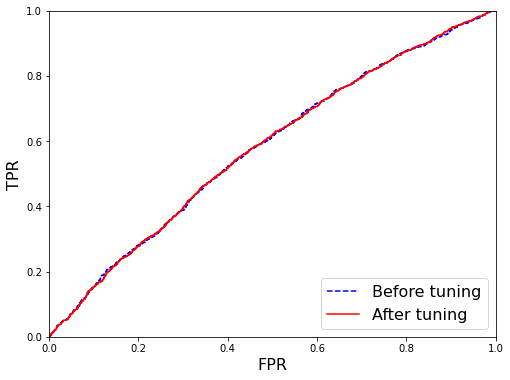

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))

fpr, tpr, thresholds = roc_curve(y_train,y_pred_logistic)
plt.plot(fpr, tpr, "b--", label="Before tuning")

fpr, tpr, thresholds = roc_curve(y_train,y_pred_logistic_2)
plt.plot(fpr, tpr, "r-", label="After tuning")

plt.xlabel("FPR", fontsize=16)
plt.ylabel("TPR", fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.show()

We can see that the Logistic Regression Model with "C" equal to 0.1 has a slightly better performance than the model with the default value of "C" equal to 1.

In [ ]:
# Check the accuracy scores for the test set between before tuning the model and after tuning the model.
y_pred_test_before = cross_val_predict(logistic, X_test, y_test, cv=10)
y_pred_test_after = cross_val_predict(logistic_2, X_test, y_test, cv=10)
y_pred_train_after = cross_val_predict(logistic_2, X_train, y_train, cv=10)

print("Accuracy score for test set Before Tuning model:",accuracy_score(y_test, y_pred_test_before))
print("Accuracy score for test set After Tuning model:",accuracy_score(y_test, y_pred_test_after))
print("Accuracy score for train set After Tuning model:",accuracy_score(y_train, y_pred_train_after))
print("Default rate of the data set:",default_rate)


Accuracy score for test set Before Tuning model: 0.8542739443872297
Accuracy score for test set After Tuning model: 0.8542739443872297
Accuracy score for train set After Tuning model: 0.8712501609372988
Default rate of the data set: 0.132145432073334


# 5 Conclusion
1. From the above analysis, I use the ROC AUC score as the criteria to evaluate these five classifiers, the best model is the Logistic Regression modle with a ROC AUC score of 0.57948.

2. After tuning the model to search for the best hyperparameter is "C" equal to 0.1, and has a little improvement for the model with the ROC AUC score is 0.57952.

3. The accuracy scores for the train set of the tuned best model is 0.871, for the test set is 0.854.

4. The true default rate of the data set is 13.2%, the accuracy rate for the test set is about 1.5% lower than the true case.

# Reference
* https://www.kaggle.com/datasets/laotse/credit-card-approval (data set)
* https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5